In [2]:
# import necessary modules
%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

DTYPE = 'float32'
n_subdivs = 100
save_folder = '../non-grad3D/data/Thomas'
n_steps = 100
dt = 0.1
t = dt * n_steps

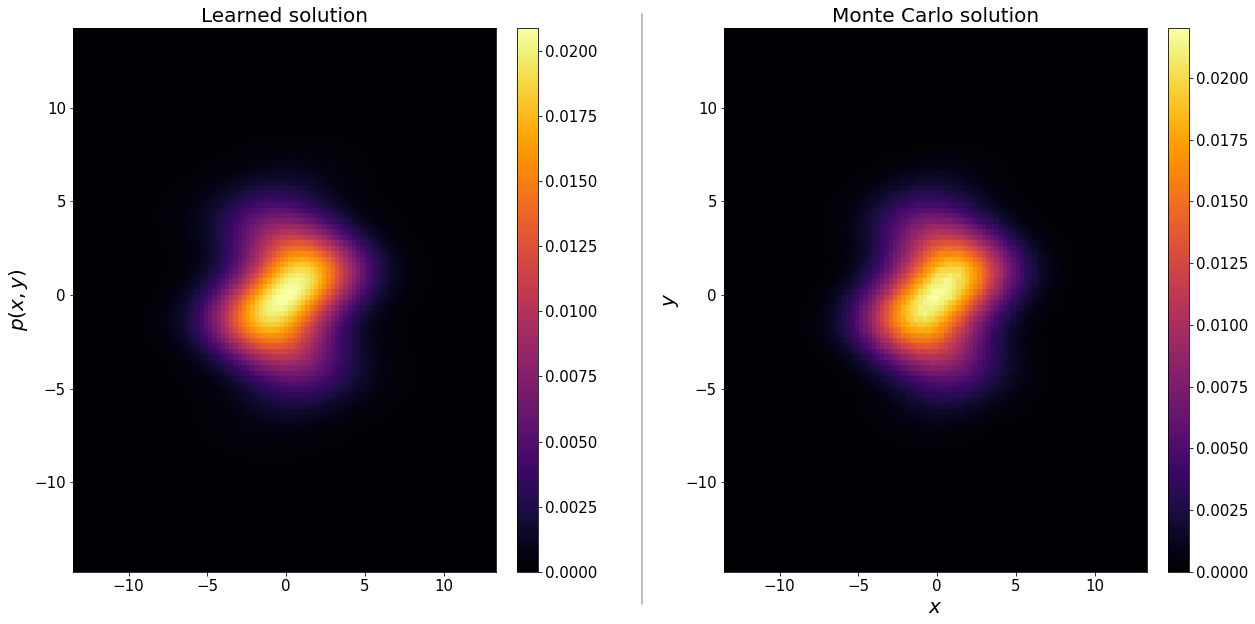

In [3]:
# set up plotting parameters
scale = 5
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# define 6 subplots
fig_all = plt.figure(figsize=(20, 10))
ax_1l = fig_all.add_subplot(121) 
ax_1m = fig_all.add_subplot(122)


# position colorbars
div_1 = make_axes_locatable(ax_1l)
cax_1 = div_1.append_axes('right', '5%', '5%')
div_4 = make_axes_locatable(ax_1m)
cax_4 = div_4.append_axes('right', '5%', '5%')


# set label size
ax_1l.tick_params(axis='both', which='major', labelsize=tick_size)
ax_1l.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_1m.tick_params(axis='both', which='major', labelsize=tick_size)
ax_1m.tick_params(axis='both', which='minor', labelsize=tick_size)


# write titles and labels
ax_1l.set_title('Learned solution', fontsize=title_size)
ax_1l.set_ylabel(r'$p(x, y)$', fontsize=ylabel_size)
ax_1m.set_title('Monte Carlo solution', fontsize=title_size)
ax_1m.set_xlabel(r'$x$', fontsize=xlabel_size)
ax_1m.set_ylabel(r'$y$', fontsize=ylabel_size)


x = np.load('../non-grad3D/data/Thomas/x.npy')
y = np.load('../non-grad3D/data/Thomas/y.npy')
z = np.load('../non-grad3D/data/Thomas/z.npy')
    

p_1m = np.load('{}/p_1m.npy'.format(save_folder))
im = ax_1m.pcolormesh(x, y, p_1m.T, cmap='inferno', shading='auto')
cbar_1m = fig_all.colorbar(im, cax=cax_4, ax=ax_1m)
cbar_1m.ax.tick_params(labelsize=cbar_tick_size)
ax_1m.set_aspect("auto")


p_1l = np.load('{}/p_1l.npy'.format(save_folder))
im = ax_1l.pcolormesh(x, y, p_1l.T, cmap='inferno', shading='auto')
cbar_1l = fig_all.colorbar(im, cax=cax_1, ax=ax_1l)
cbar_1l.ax.tick_params(labelsize=cbar_tick_size)
ax_1l.set_aspect("auto")


# plot and save
fig_all.subplots_adjust(wspace=0.4, hspace=0.2)
# Get the bounding boxes of the axes including text decorations
x = 0.475
line = plt.Line2D([x+.045,x+.045],[0.08,0.9], transform=fig_all.transFigure, color=line_color)
fig_all.add_artist(line)
plt.savefig('../plots/Thomas-steady.png')